In [202]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import json
from sklearn.metrics import silhouette_score

In [203]:
with open("training.json", "r") as infile:

    json_data = json.load(infile)
data = pd.DataFrame(json_data['tracks'])
uris = pd.Series(data["uri"])
training_data = data.drop("uri", axis = 1)


In [204]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


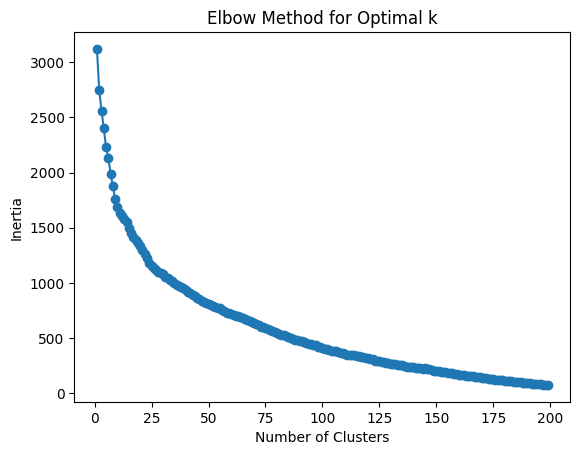

In [205]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(training_data)

# Compute K-Means for different numbers of clusters and store the inertia (within-cluster sum of squares)
inertia = []
cluster_range = range(1, 200)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the nearest centroid

# Plot the Elbow graph
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [213]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)
# 2. Initialize DBSCAN with eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples for your dataset

# 3. Fit the DBSCAN model
dbscan.fit(scaled_data)

# 4. Get the cluster labels
labels = dbscan.labels_

# 5. Calculate silhouette score (optional for evaluation, ignore noise points (-1 labels))
if len(set(labels)) > 1 and -1 in labels:
    silhouette = silhouette_score(scaled_data, labels[labels != -1])  # Exclude noise (-1)
    print(f'Silhouette Score: {silhouette}')
else:
    print("Too few clusters or all points are noise")

# 6. Inspect the labels
print(f'Cluster Labels: {labels}')

Too few clusters or all points are noise
Cluster Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [214]:
from grouping import scale_audio_features

In [215]:
k_sil = []
agg_sil = []
kmax = 100
max_iter = 50
max_n_init = 100

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
scaler = StandardScaler(with_mean=False, with_std=False)
# scaled_features = scaler.fit_transform(training_data)
# scale_audio_features(training_data, ["time_signature","tempo", "loudness", "key", "valence", "danceability", "energy", "mode"], [0.1, 0.01, 1/90,0.05, 1.5, 1.2, 2.0, 0.6])
for k in range(2, kmax+1):

  kmeans = KMeans(n_clusters = k).fit(training_data)
  kmeans_labels = kmeans.labels_
  k_sil.append((k,float(silhouette_score(training_data, kmeans_labels, metric = 'euclidean'))))
print(k_sil)



[(2, 0.31419831426880906), (3, 0.26407194424996194), (4, 0.20341756492978713), (5, 0.20256174828126447), (6, 0.1852345846228119), (7, 0.19857474260535343), (8, 0.1893293482564298), (9, 0.17620586306880076), (10, 0.16744927237749166), (11, 0.16773555858192193), (12, 0.1746892489484104), (13, 0.1758735808250854), (14, 0.18390825174028116), (15, 0.17206182920085186), (16, 0.16737376435664256), (17, 0.15798894594681862), (18, 0.15741276666884746), (19, 0.17309521164688876), (20, 0.15470712831816033), (21, 0.15646621051500179), (22, 0.1705072314057331), (23, 0.16256096409212392), (24, 0.17418682675194253), (25, 0.1731001902513197), (26, 0.1658773979448094), (27, 0.19284498908864026), (28, 0.16684274964576182), (29, 0.16675238506236076), (30, 0.1703766177193174), (31, 0.1686159654166565), (32, 0.17573731295789527), (33, 0.17883853761209434), (34, 0.17356267094532227), (35, 0.1797140743695839), (36, 0.18421569880937164), (37, 0.17012180980387337), (38, 0.1889638163924355), (39, 0.181160458815

In [125]:
kmeans = KMeans(n_clusters = 10, random_state = 0, n_init='auto')
kmeans.fit(training_data)
clusters = kmeans.labels_
training_data['cluster'] = clusters
training_data["uri"] = uris

In [113]:
print(training_data["cluster"].value_counts())
training_data

cluster
2    81
5    74
1    56
3    56
0    55
8    50
7    49
4    35
6    29
9    28
Name: count, dtype: int64


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,cluster,id
0,0.703,0.757,1,-3.612,1,0.0500,0.61700,0.000000,0.696,82.008,4,0,2eAZfqOm4EnOF9VvN50Tyc
1,0.865,0.624,8,-8.224,1,0.1030,0.03300,0.000000,0.396,94.940,4,7,2iWEpiPiIPf5D4f2UGBlrZ
2,0.797,0.732,9,-4.443,0,0.0483,0.23400,0.000000,0.628,146.924,4,1,1Faq8G2y56A8fRv7HsLq25
3,0.795,0.568,5,-7.817,0,0.1420,0.05410,0.000000,0.478,136.173,4,5,0B8QzDH7YWih85V5SEMnyJ
4,0.777,0.678,2,-4.502,1,0.3760,0.00476,0.000000,0.810,181.885,4,6,4HK9Ive4wK7426QXxQZS6L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0.774,0.818,4,-2.825,0,0.1450,0.12700,0.000000,0.438,142.084,4,1,5tEaVciE2GnR28aN6W9cLS
509,0.814,0.676,11,-4.670,0,0.2310,0.00709,0.000013,0.312,162.012,4,3,2tudvzsrR56uom6smgOcSf
510,0.769,0.722,11,-5.485,0,0.0507,0.05840,0.000003,0.570,119.973,4,2,1Es7AUAhQvapIcoh3qMKDL
511,0.760,0.663,9,-4.763,0,0.0551,0.10900,0.000000,0.209,143.082,4,1,2cZOYofOX4d6g0OXxkaIjA


In [114]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(training_data)
  labels = kmeans.labels_
  sil.append(silhouette_score(training_data, labels, metric = 'euclidean'))

<Axes: xlabel='danceability', ylabel='energy'>

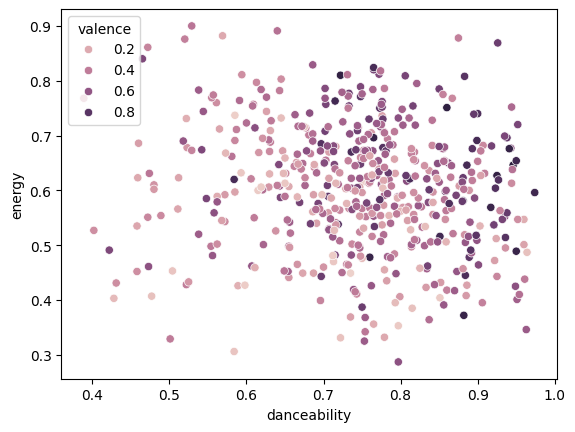

In [98]:
sns.scatterplot(data = data, x = 'danceability', y = 'energy', hue = 'valence')

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data[['danceability', 'energy']], data[['valence']], test_size=0.33, random_state=0)

In [66]:
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

KMeans(n_clusters=10, random_state=0)

In [63]:
sns.scatterplot(data = X_train, x = 'danceability', y = 'energy', hue = kmeans.labels_)

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Axes: ylabel='valence'>

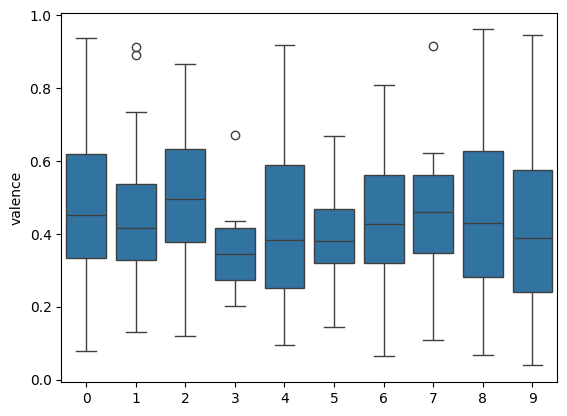

In [53]:
sns.boxplot(x = kmeans.labels_, y = y_train['valence'])

In [54]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

np.float64(0.5327761742737749)